# AIPI 590 - XAI | Assignment #07
### Description
### Your Name: Wilson Tseng

#### Assignment 7 - Explainable Deep Learning:
[GitHub Link](https://github.com/smilewilson1999/XAI/tree/2602b284ffba22ca525903d9a2dc116459786232/Assignment%207%20-%20Explainable%20Deep%20Learning)


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/smilewilson1999/XAI/blob/main/Assignment%207%20-%20Explainable%20Deep%20Learning/Explainable_Deep_Learning_Test.ipynb)

## DO:
* Use markdown and comments effectively
* Pull out classes and functions into scripts
* Ensure cells are executed in order and avoid skipping cells to maintain reproducibility
* Choose the appropriate runtime (i.e. GPU) if needed
* If you are using a dataset that is too large to put in your GitHub repository, you must either pull it in via Hugging Face Datasets or put it in an S3 bucket and use boto3 to pull from there.
* Use versioning on all installs (ie pandas==1.3.0) to ensure consistency across versions
* Implement error handling where appropriate

## DON'T:
* Absolutely NO sending us Google Drive links or zip files with data (see above).
* Load packages throughout the notebook. Please load all packages in the first code cell in your notebook.
* Add API keys or tokens directly to your notebook!!!! EVER!!!
* Include cells that you used for testing or debugging. Delete these before submission
* Have errors rendered in your notebook. Fix errors prior to submission.

In [10]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data
!rm -r ./sample_data

# Clone GitHub files to colab workspace
repo_name = "XAI" # Change to your repo name
git_path = 'https://github.com/smilewilson1999/XAI.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment 7 - Explainable Deep Learning'
path_to_notebook = os.path.join(repo_name, notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'XAI'...
remote: Enumerating objects: 153, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 153 (delta 0), reused 1 (delta 0), pack-reused 149 (from 1)
Receiving objects: 100% (153/153), 242.80 MiB | 25.25 MiB/s, done.
Resolving deltas: 100% (44/44), done.
Updating files: 100% (66/66), done.
/content/XAI/Assignment 7 - Explainable Deep Learning
concept_images/  data/  Explainable_Deep_Learning_Test.ipynb  random_images/


#### Using environment variables in Google Colab

In Google Colab, locate the key button on the left side of the screen. You can enter in any environment variables or API keys here and they will remain private.

Then add the environment variables to your notebook using the code below.

Make sure to document in your notebook if you are using API keys and how to get them (ie share a link for documentation to get a Hugging Face API Key if you are using Hugging Face)

In [5]:
!pip3 install captum pyodbc==4.0.30 tcav torchvision tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 3.6 MB/s eta 0:00:00
  Created wheel for pyodbc: filename=pyodbc-4.0.30-cp310-cp310-linux_x86_64.whl size=302316 sha256=9de22f422cae853dc6e9e41cd5f5835dfdeb2bbbf1ba6aa6a15c75a7c5517cb7
  Stored in directory: /root/.cache/pip/wheels/d5/7c/2d/dc50207ab6c60a642bf15a7cf757825cd1302b89d0e45df827
Successfully built pyodbc


## Hypothesis

H0: The ResNet model does not show a significant difference in its ability to learn the concept of the "airplane" category compared to the "car" category.

H1: The ResNet model shows significantly better learning performance for the "airplane" category compared to the "car" category.

In [11]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader


# Load pre-trained ResNet18 model
model = models.resnet18(pretrained=True)
model.eval()  # 設置模型為評估模式 Set model to evaluation mode

# Data preprocessing and loading CIFAR-10 dataset
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalization
])

# Load CIFAR-10 test dataset [cited from ChatGPT4o to let me know this useful dataset]
dataset = datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

# Check if the dataset is correctly loaded
data_iter = iter(dataloader)
images, labels = next(data_iter)


print(f"Images batch shape: {images.size()}")  # Display image batch size
print(f"Labels batch shape: {labels.size()}")  # Display label batch size


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Files already downloaded and verified
Images batch shape: torch.Size([32, 3, 224, 224])
Labels batch shape: torch.Size([32])


## Example

[cited from GPT4o for helping me trial and error]

In [12]:
# CIFAR-10 label map
label_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
             5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Check the labels in the batch
for i in range(len(labels)):
    print(f"Image {i} label: {label_map[labels[i].item()]}")

# Filter our targeted data - 'airplane' and 'automobile'
airplane_or_car_indices = [i for i in range(len(labels)) if labels[i].item() in [0, 1]]
filtered_images = images[airplane_or_car_indices]
filtered_labels = labels[airplane_or_car_indices]

# print(f"Filtered images shape: {filtered_images.shape}")

Image 0 label: ship
Image 1 label: truck
Image 2 label: deer
Image 3 label: truck
Image 4 label: airplane
Image 5 label: deer
Image 6 label: deer
Image 7 label: horse
Image 8 label: horse
Image 9 label: truck
Image 10 label: truck
Image 11 label: cat
Image 12 label: automobile
Image 13 label: cat
Image 14 label: frog
Image 15 label: automobile
Image 16 label: frog
Image 17 label: frog
Image 18 label: dog
Image 19 label: bird
Image 20 label: horse
Image 21 label: airplane
Image 22 label: cat
Image 23 label: cat
Image 24 label: automobile
Image 25 label: frog
Image 26 label: bird
Image 27 label: frog
Image 28 label: ship
Image 29 label: frog
Image 30 label: deer
Image 31 label: bird


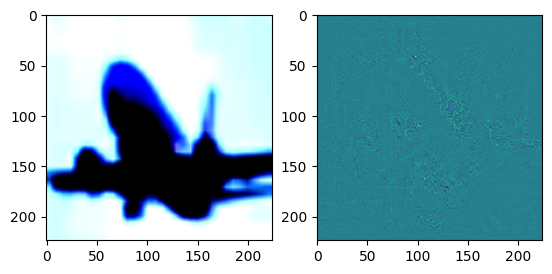

In [13]:
from captum.attr import IntegratedGradients
import matplotlib.pyplot as plt
import numpy as np

# Use Integrated Gradients
ig = IntegratedGradients(model)

# Use the filtered images for explanation
input_image = filtered_images[0].unsqueeze(0)  # Take the first image as an example

# Compute integrated gradients
attributions, delta = ig.attribute(input_image, target=filtered_labels[0].item(), return_convergence_delta=True)

# Convert the attributions from multi-channel to single-channel by averaging the RGB channels [cited from ChatGPT4o to debug]
attributions = attributions.squeeze().mean(dim=0).detach().cpu().numpy()

# Normalize the gradients to enhance visibility [cited from ChatGPT4o to debug] p.s. the original one is too dark
attributions = (attributions - attributions.min()) / (attributions.max() - attributions.min())

# Use a heatmap to visualize the gradients
fig, ax = plt.subplots(1, 2)
ax[0].imshow(filtered_images[0].permute(1, 2, 0))  # The original image
# ax[1].imshow(attributions, cmap='hot')  # Show gradients with heatmap
# ax[1].imshow(attributions, cmap='inferno') # Show gradients with heatmap
ax[1].imshow(attributions, cmap='viridis') # Show gradients with heatmap
plt.show()


## My turn and analysis

In [14]:
# # CIFAR-10 label map
# label_map = {0: "airplane", 1: "automobile", 2: "bird", 3: "cat", 4: "deer",
#              5: "dog", 6: "frog", 7: "horse", 8: "ship", 9: "truck"}

# Select 'airplane' and 'automobile' images
airplane_index = [i for i, label in enumerate(labels) if label == 0]  # The label for "airplane" is 0.
car_index = [i for i, label in enumerate(labels) if label == 1]  # The label for "automobile" is 1.

# Take one airplane and one car image
airplane_image = images[airplane_index[0]].unsqueeze(0)
car_image = images[car_index[0]].unsqueeze(0)


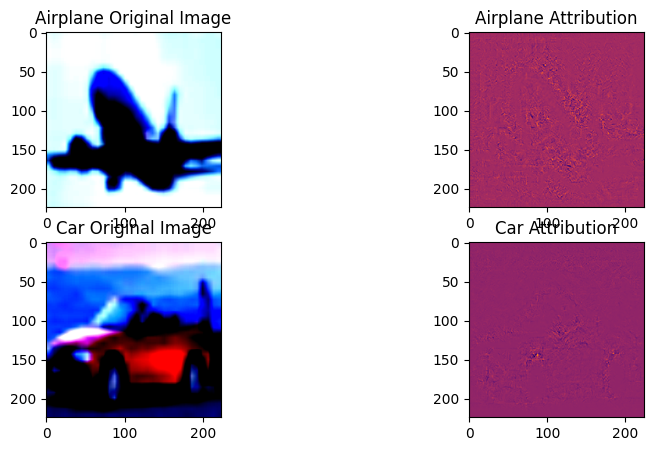

In [15]:
# Perform explanation on 'airplane'
attributions_airplane, _ = ig.attribute(airplane_image, target=0, return_convergence_delta=True)

# Perform explanation on 'automobile'
attributions_car, _ = ig.attribute(car_image, target=1, return_convergence_delta=True)

# Normalize and convert to single-channel
attributions_airplane = attributions_airplane.squeeze().mean(dim=0).detach().cpu().numpy()
attributions_car = attributions_car.squeeze().mean(dim=0).detach().cpu().numpy()

attributions_airplane = (attributions_airplane - attributions_airplane.min()) / (attributions_airplane.max() - attributions_airplane.min())
attributions_car = (attributions_car - attributions_car.min()) / (attributions_car.max() - attributions_car.min())

# Visualize the results
fig, ax = plt.subplots(2, 2, figsize=(10, 5))
ax[0, 0].imshow(airplane_image.squeeze().permute(1, 2, 0).cpu().numpy())
ax[0, 0].set_title("Airplane Original Image")
ax[0, 1].imshow(attributions_airplane, cmap='inferno') # Show gradients with heatmap
ax[0, 1].set_title("Airplane Attribution")

ax[1, 0].imshow(car_image.squeeze().permute(1, 2, 0).cpu().numpy())
ax[1, 0].set_title("Car Original Image")
ax[1, 1].imshow(attributions_car, cmap='inferno') # Show gradients with heatmap
ax[1, 1].set_title("Car Attribution")
plt.show()


1.   Left: Original image of the airplane / Right: Integrated Gradients plot (represents the model's focus to the certain place)

  We can tell the model focuses more on central areas or the outline of the airplane image, indicating the model has a stronger focus when processing the airplane image.

2.   Left: Original image of the car / Right: Integrated Gradients plot

  I want to see the gradient map of the car showing some key areas (the front of the car, the headstock or the headlights), but the overall distribution is relatively even, which implies that the model's learning is less concentrated in specific areas compared to the airplane image.

In this case, I would say the model appears to have learned the "airplane" category more effectively than the "car" category, which aligns more closely with **H1**

In [124]:
# # Basic
# import os
# import absl
# import random
# import matplotlib.pyplot as plt
# from PIL import Image

# #Model
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# import tensorflow.compat.v1 as tfv1

# #XAI
# import tcav
# import tcav.activation_generator as act_gen
# import tcav.model as tcav_model
# import tcav.tcav as tcav
# import tcav.utils as utils
# import tcav.utils_plot as utils_plot
# from tcav.cav import CAV

In [116]:
# import pickle

# # Save the CAV instance to a file
# def save_cav(cav_instance, cav_dir, concept_name):
#     # Check if the directory exists, if not, create it
#     if not os.path.exists(cav_dir):
#         os.makedirs(cav_dir)

#     cav_path = os.path.join(cav_dir, f"{concept_name}_cav.pkl")

#     # Save the CAV file
#     with open(cav_path, 'wb') as f:
#         pickle.dump(cav_instance, f)
#     print(f"CAV saved at {cav_path}")

# # Load the CAV instance from a file
# def load_cav(cav_dir, concept_name):
#     cav_path = os.path.join(cav_dir, f"{concept_name}_cav.pkl")
#     with open(cav_path, 'rb') as f:
#         cav_instance = pickle.load(f)
#     print(f"CAV loaded from {cav_path}")
#     return cav_instance

In [117]:
# # Load pre-trained ResNet50 model
# model = ResNet50(weights='imagenet', include_top=True)
# model.model_name = 'ResNet50'

# # Define the input shape for the model
# input_shape = (224, 224)

# # Set up a data generator for CIFAR-10 images
# datagen = ImageDataGenerator(rescale=1.0/255)

# # Load CIFAR-10 data (or custom data)
# train_data = datagen.flow_from_directory(
#     './data',  # Update this path to where your CIFAR-10-like data is stored
#     target_size=input_shape,
#     batch_size=32,
#     class_mode='categorical',
#     shuffle=True
# )

Found 0 images belonging to 1 classes.


In [ ]:
# # Define directories for concepts and random images
# concepts_dir = 'concepts/'  # Folder where your concept images are stored
# random_dir = 'concepts/random_images/'  # Folder where random images are stored

# # Bottleneck layer to test
# bottleneck = 'conv5_block3_out'  # Bottleneck layer in ResNet50

# # Target classes (e.g., airplane and car from CIFAR-10)
# target_classes = ['airplane', 'car']

# # Path to save CAVs (Concept Activation Vectors)
# cav_dir = 'cavs/'

# # Create ActivationGenerator
# act_generator = act_gen.ImageActivationGenerator(model, target_classes, concepts_dir, random_dir)

# # Create CAVs for each concept
# for concept in ['airplane_wings_different_angles', 'car_headlights']:
#     # Generate CAV for each concept
#     cav_instance = CAV([concept], random_dir, bottleneck, act_generator)

#     # Save the CAV for future use
#     save_cav(cav_instance, cav_dir, concept)

# # Now, set up and run TCAV
# tcav_instance = TCAV(
#     target=target_classes,  # Target classes (airplane and car)
#     concepts=['airplane_wings_different_angles', 'car_headlights'],  # Concepts to test
#     bottlenecks=[bottleneck],  # Bottleneck layer to test
#     activation_generator=act_generator,  # ActivationGenerator for this experiment
#     cav_dir=cav_dir  # Directory where CAVs are stored
# )

# # Run TCAV analysis
# tcav_scores = tcav_instance.run()

# # Display TCAV scores for each concept and target class
# for score in tcav_scores:
#     print(f"Concept: {score['concept']}, Target: {score['target_class']}, TCAV Score: {score['score']}")